In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 




In [28]:
df = pd.read_csv("loan.csv")

In [29]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [12]:
ss.fit(df[['ApplicantIncome']])
# this is standardization method of feature scaling 

StandardScaler()

In [30]:
df['ApplicantIncome_ss'] = pd.DataFrame(ss.transform(df[['ApplicantIncome']]) , columns=['x']) 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_ss
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0.072991
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,-0.134412
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,-0.393747
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,-0.462062
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0.097728


In [10]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,ApplicantIncome_ss
count,614.000000,614.000000,592.000000,600.00000,564.000000,6.140000e+02
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199,-4.339634e-18
std,6109.041673,2926.248369,85.587325,65.12041,0.364878,1.000815e+00
min,150.000000,0.000000,9.000000,12.00000,0.000000,-8.606493e-01
25%,2877.500000,0.000000,100.000000,360.00000,1.000000,-4.138159e-01
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000,-2.606393e-01
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000,6.414426e-02
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,1.238462e+01


C:\Users\shant\AppData\Local\Temp\ipykernel_14412\3310853404.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ApplicantIncome_ss'])


<Axes: xlabel='ApplicantIncome_ss', ylabel='Density'>

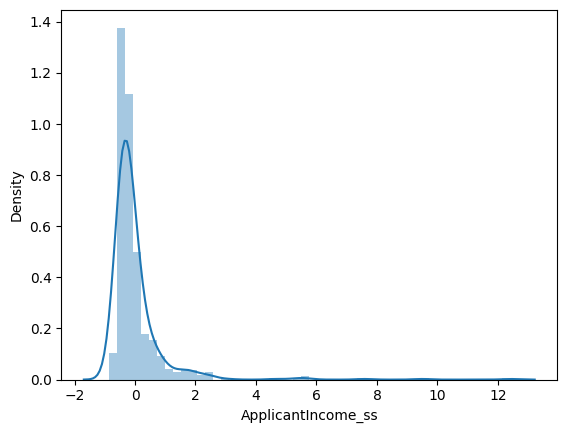

In [31]:
sns.distplot(df['ApplicantIncome_ss'])

In [32]:
# now we will see the normalization method 
from sklearn.preprocessing import MinMaxScaler

In [33]:
ms = MinMaxScaler()

In [34]:
ms.fit(df[['CoapplicantIncome']])

MinMaxScaler()

In [35]:
df['CoapplicantIncome_minmax'] = pd.DataFrame(ms.transform(df[["CoapplicantIncome"]]))

In [36]:
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_ss,CoapplicantIncome_minmax
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0.072991,0.000000
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,-0.134412,0.036192
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,-0.393747,0.000000


C:\Users\shant\AppData\Local\Temp\ipykernel_14412\3112252009.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["CoapplicantIncome"])
C:\Users\shant\AppData\Local\Temp\ipykernel_14412\3112252009.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["CoapplicantIncome_minmax"])


<Axes: title={'center': 'after'}, xlabel='CoapplicantIncome_minmax', ylabel='Density'>

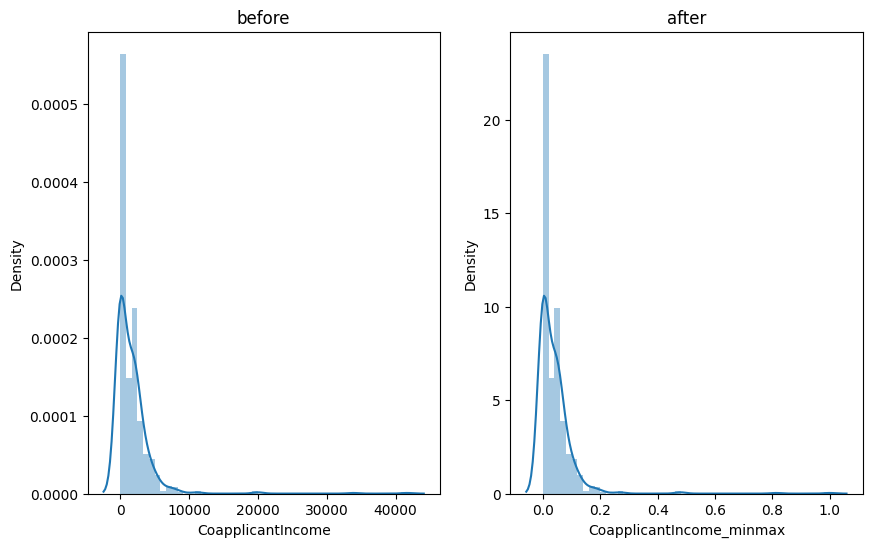

In [38]:
plt.figure(figsize = (10,6))
plt.subplot(1,2,1)   #(row , column , ploting_number)
plt.title("before")
sns.distplot(df["CoapplicantIncome"])

plt.subplot(1,2,2)   #(row , column , ploting_number)
plt.title("after")
sns.distplot(df["CoapplicantIncome_minmax"])

# now you can see your data is reduced to 0 to 1